In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
from utilities import nodo2tree
import shuntingyard as sy
import importlib
from IPython.display import Math as show_latex

In [7]:
from semplificatore import Semplificatore as smp

In [88]:
test_expr = "1 + {2 * [(3 + 4 : 2) + 5] * 6} - [7 + (1 + 8) : 3] * [9 : (2 + 1) + 2]#"
test_pow = "2^(3+4^5:2^7)#"
test_frac_1 = "(2+4)/(3+4)#"
test_riassuntivo = "3 + 13 * ~(1+3) / (2^(1+4) - 6)#"
test_parentesi_semplice = "3/(4+2) + 2 * {3:(4+5) + 2^(6*1/2)}-(2*[5*(3+4)+5]-1)/6#"
test_parentesi_libere = "3/(4+2) + 2 * (3:(4+5) + 2^(6*1/2))-(2*(5*(3+4)+5)-1)/6#"
test_parentesi_libere2 = "3/(4+2) + 2 * (3:(4+5) : 2^(6*1/2))-(2*(5*(3+4)+5)-1)/6#"
test_rapido = "3 + 3 + 8 + 6 * 2#"
test_segni_unari_multipli = "---3 + -56 * -(-(-(5)))#"
test_lungo = "-19 + 4 * 45 / {12^[3+60/6:5] - 7/4 + 3 * (13 - 5 * -2^3)} * 22 / 143 - [13^2/45*3+3/(7+3^2)] : 3 - 1 + {12^(3+4)/12 + [5 - 3*4 + -(4^(9/3))]}#"

In [91]:
n = sy.parse_expr(test_lungo, 'Q')
simpler = smp(n)
# nodo2tree(n)

In [90]:
texts = simpler.solve()
text = '\\\\&'.join(texts)
text = "\\begin{align}" + text + "\end{align}"
show_latex(text)

{'type': 'Potenza', 'id': 28, 'colore': 'red'}, [{'type': 'Numero', 'id': 27, 'value': 2}, [], {'type': 'Numero', 'id': 29, 'value': 3}, []]
{'type': 'Potenza', 'id': 73, 'colore': 'red'}, [{'type': 'Numero', 'id': 72, 'value': 4}, [], {'type': 'Numero', 'id': 75, 'value': 3}, []]
{'type': 'Potenza', 'id': 38, 'colore': 'red'}, [{'type': 'Numero', 'id': 37, 'value': 13}, [], {'type': 'Numero', 'id': 39, 'value': 2}, []]
{'type': 'Potenza', 'id': 50, 'colore': 'red'}, [{'type': 'Numero', 'id': 49, 'value': 3}, [], {'type': 'Numero', 'id': 51, 'value': 2}, []]
{'type': 'Potenza', 'id': 59, 'colore': 'red'}, [{'type': 'Numero', 'id': 58, 'value': 12}, [], {'type': 'Numero', 'id': 61, 'value': 7}, []]
{'type': 'Potenza', 'id': 8, 'colore': 'red'}, [{'type': 'Numero', 'id': 7, 'value': 12}, [], {'type': 'Numero', 'id': 10, 'value': 5}, []]


<IPython.core.display.Math object>

In [45]:
print(simpler.root.get_latex())
print(  )
print(simpler.nodes_type2node_id)
print(  )
print(texts)
print(  )
show_latex(simpler.root.get_latex())

4

{'Nodo': [], 'ParentesiTonde': [13, 22, 31, 34], 'ParentesiQuadre': [], 'ParentesiGraffe': [], 'Addizione': [3, 11, 14, 29, 32, 5], 'Sottrazione': [35, 23], 'Moltiplicazione': [18, 7, 27, 25], 'Divisione': [9], 'MenoUnario': [], 'Frazione': [1, 20, 37], 'Potenza': [16], 'Numero': [0, 2, 4, 6, 8, 10, 12, 15, 17, 19, 21, 24, 26, 28, 30, 33, 36, 38]}

['&\\frac{3} {4 + 2} + 2 \\times \\left( 3 : \\left( 4 + 5 \\right) + 2 ^ {6 \\times \\frac{1} {2}} \\right) - \\frac{2 \\times \\left( 5 \\times \\left( 3 + 4 \\right) + 5 \\right) - 1} {6}', '\\frac{3} {4 + 2} + 2 \\times \\left( 3 : \\color{blue} {\\left( \\color{red} {\\boxed{4 + 5}} \\right)} + 2 ^ {6 \\times \\frac{1} {2}} \\right) - \\frac{2 \\times \\left( 5 \\times \\left( 3 + 4 \\right) + 5 \\right) - 1} {6}', '\\frac{3} {4 + 2} + 2 \\times \\color{blue} {\\left( \\color{red} {\\boxed{3 : \\color{green} {\\boxed{9}}}} + 2 ^ {6 \\times \\frac{1} {2}} \\right)} - \\frac{2 \\times \\left( 5 \\times \\left( 3 + 4 \\right) + 5 \\righ

<IPython.core.display.Math object>

In [46]:
def string2latex(s):
    n = sy.parse_expr(s, 'Q')
    simpler = smp(n)
    texts = simpler.solve()
    text = '\\\\&'.join(texts)
    text = "\\begin{align}" + text + "\end{align}"
    return text

In [98]:
casi_semplici = ["(2+4)/(3+4)#", "2/3/4#", "5/(6/7)#", "(2*3+4)/5#", "2/(3+4/5)#", "(((2+3)/4)/(5+6))/7#"]
potenze = ["-2^(-2)", "(1/2)^3"]

In [100]:
lista_di_latex = []
for t in potenze:
    lista_di_latex.append(string2latex(t))
    print(t, "ok")

-2^(-2) ok
(1/2)^3 ok


In [102]:
show_latex(lista_di_latex[1])

<IPython.core.display.Math object>

In [49]:
lista_di_latex

['\\begin{align}&\\frac{2 + 4} {3 + 4}\\\\&\\frac{\\color{red} {\\boxed{2 + 4}}} {3 + 4}\\\\&\\frac{\\color{green} {\\boxed{6}}} {\\color{red} {\\boxed{3 + 4}}}\\\\&\\color{red} {\\boxed{\\frac{6} {\\color{green} {\\boxed{7}}}}}\\\\&\\color{green} {\\boxed{\\frac{6} {7}}}\\end{align}',
 '\\begin{align}&\\frac{2} {\\frac{3} {4}}\\\\&\\color{red} {\\boxed{\\frac{2} {\\frac{3} {4}}}}\\\\&\\color{green} {\\boxed{\\frac{8} {3}}}\\end{align}',
 '\\begin{align}&\\frac{5} {\\frac{6} {7}}\\\\&\\color{red} {\\boxed{\\frac{5} {\\frac{6} {7}}}}\\\\&\\color{green} {\\boxed{\\frac{35} {6}}}\\end{align}',
 '\\begin{align}&\\frac{2 \\times 3 + 4} {5}\\\\&\\frac{\\color{red} {\\boxed{2 \\times 3}} + 4} {5}\\\\&\\frac{\\color{red} {\\boxed{\\color{green} {\\boxed{6}} + 4}}} {5}\\\\&\\color{red} {\\boxed{\\frac{\\color{green} {\\boxed{10}}} {5}}}\\\\&\\color{green} {\\boxed{2}}\\end{align}',
 '\\begin{align}&\\frac{2} {3 + \\frac{4} {5}}\\\\&\\frac{2} {3 + \\color{red} {\\boxed{\\frac{4} {5}}}}\\\\&\\fra

In [51]:
n = sy.parse_expr(casi_semplici[5], 'Q')
simpler = smp(n)


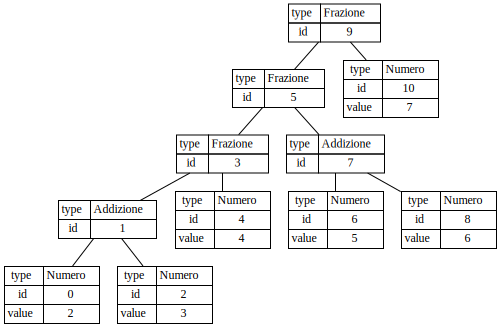

In [52]:
nodo2tree(n)